In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('student_data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [10]:
# Select features for clustering
features = ['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
X = data[features]

# Handle missing values if any
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    if k > 1:  # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_scaled, labels))

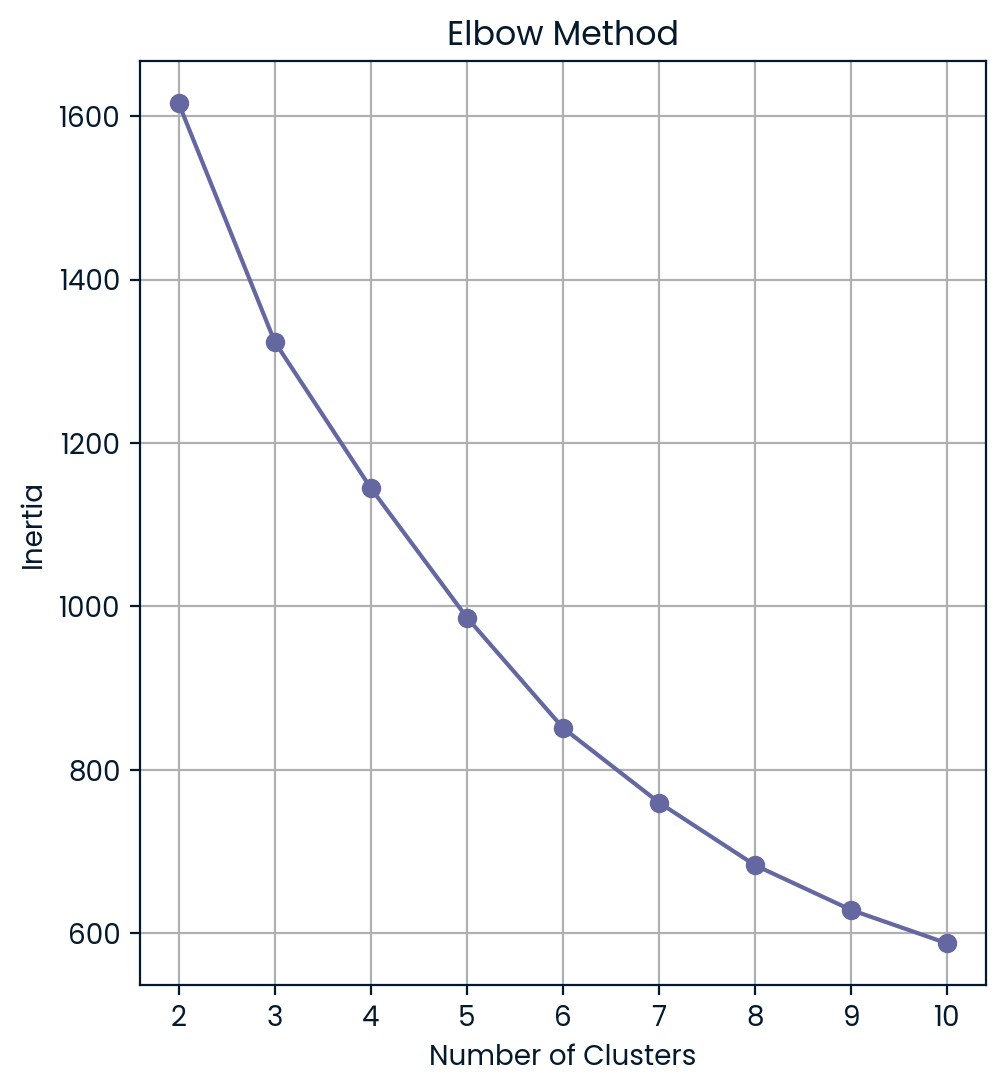

In [8]:

# Plot the elbow method results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)


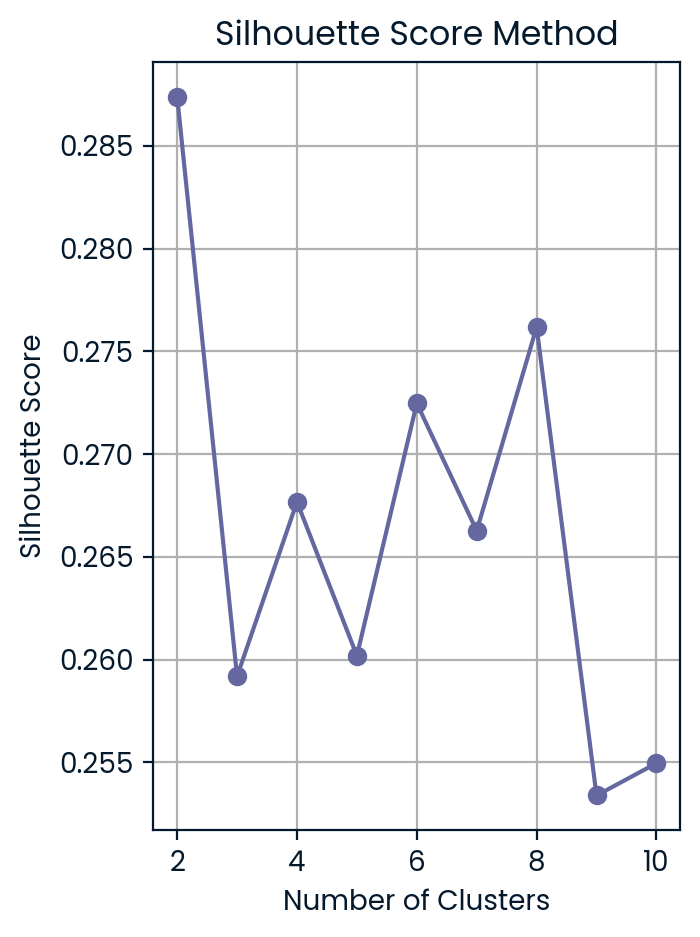

In [12]:
# Plot silhouette scores - ensure x and y have same dimensions
plt.subplot(1, 2, 2)
plt.plot(list(k_range), silhouette_scores, marker='o')  # Both arrays now have the same length
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.savefig('elbow_method.png')
plt.show()

## Based on the elbow method, choose the optimal number of clusters

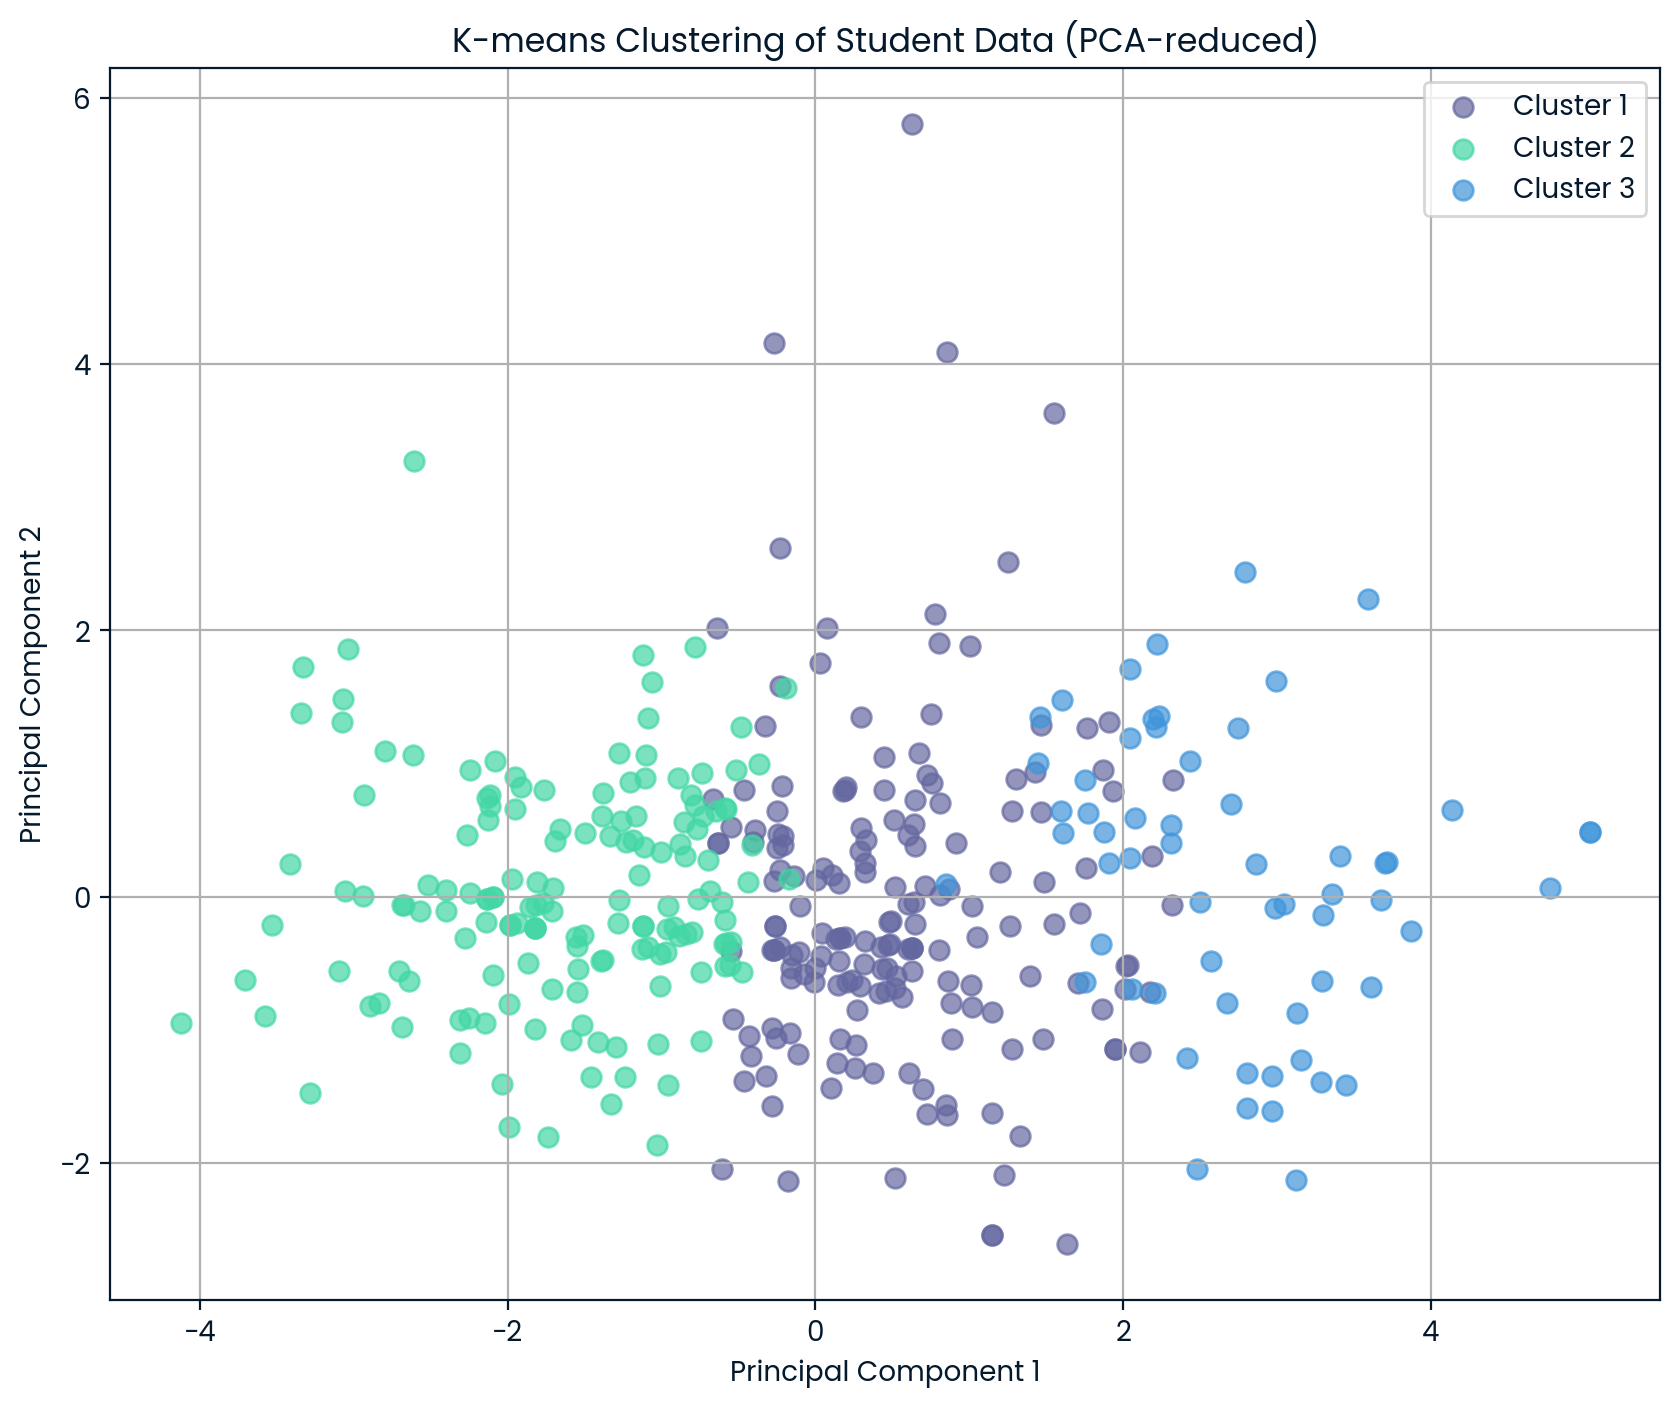

In [13]:
# For this example, let's say we choose 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['cluster'] = clusters

# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters in 2D space
plt.figure(figsize=(10, 8))
for i in range(optimal_k):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], 
                label=f'Cluster {i+1}', s=50, alpha=0.7)

plt.title('K-means Clustering of Student Data (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('kmeans_clusters.png')
plt.show()

Cluster Characteristics:
         studytime  failures  absences         G1         G2         G3
cluster                                                                
0         2.073034  0.112360  7.657303   9.241573   9.359551   9.101124
1         2.140127  0.095541  4.292994  14.222930  14.191083  14.394904
2         1.650000  1.616667  3.633333   7.183333   5.633333   3.900000


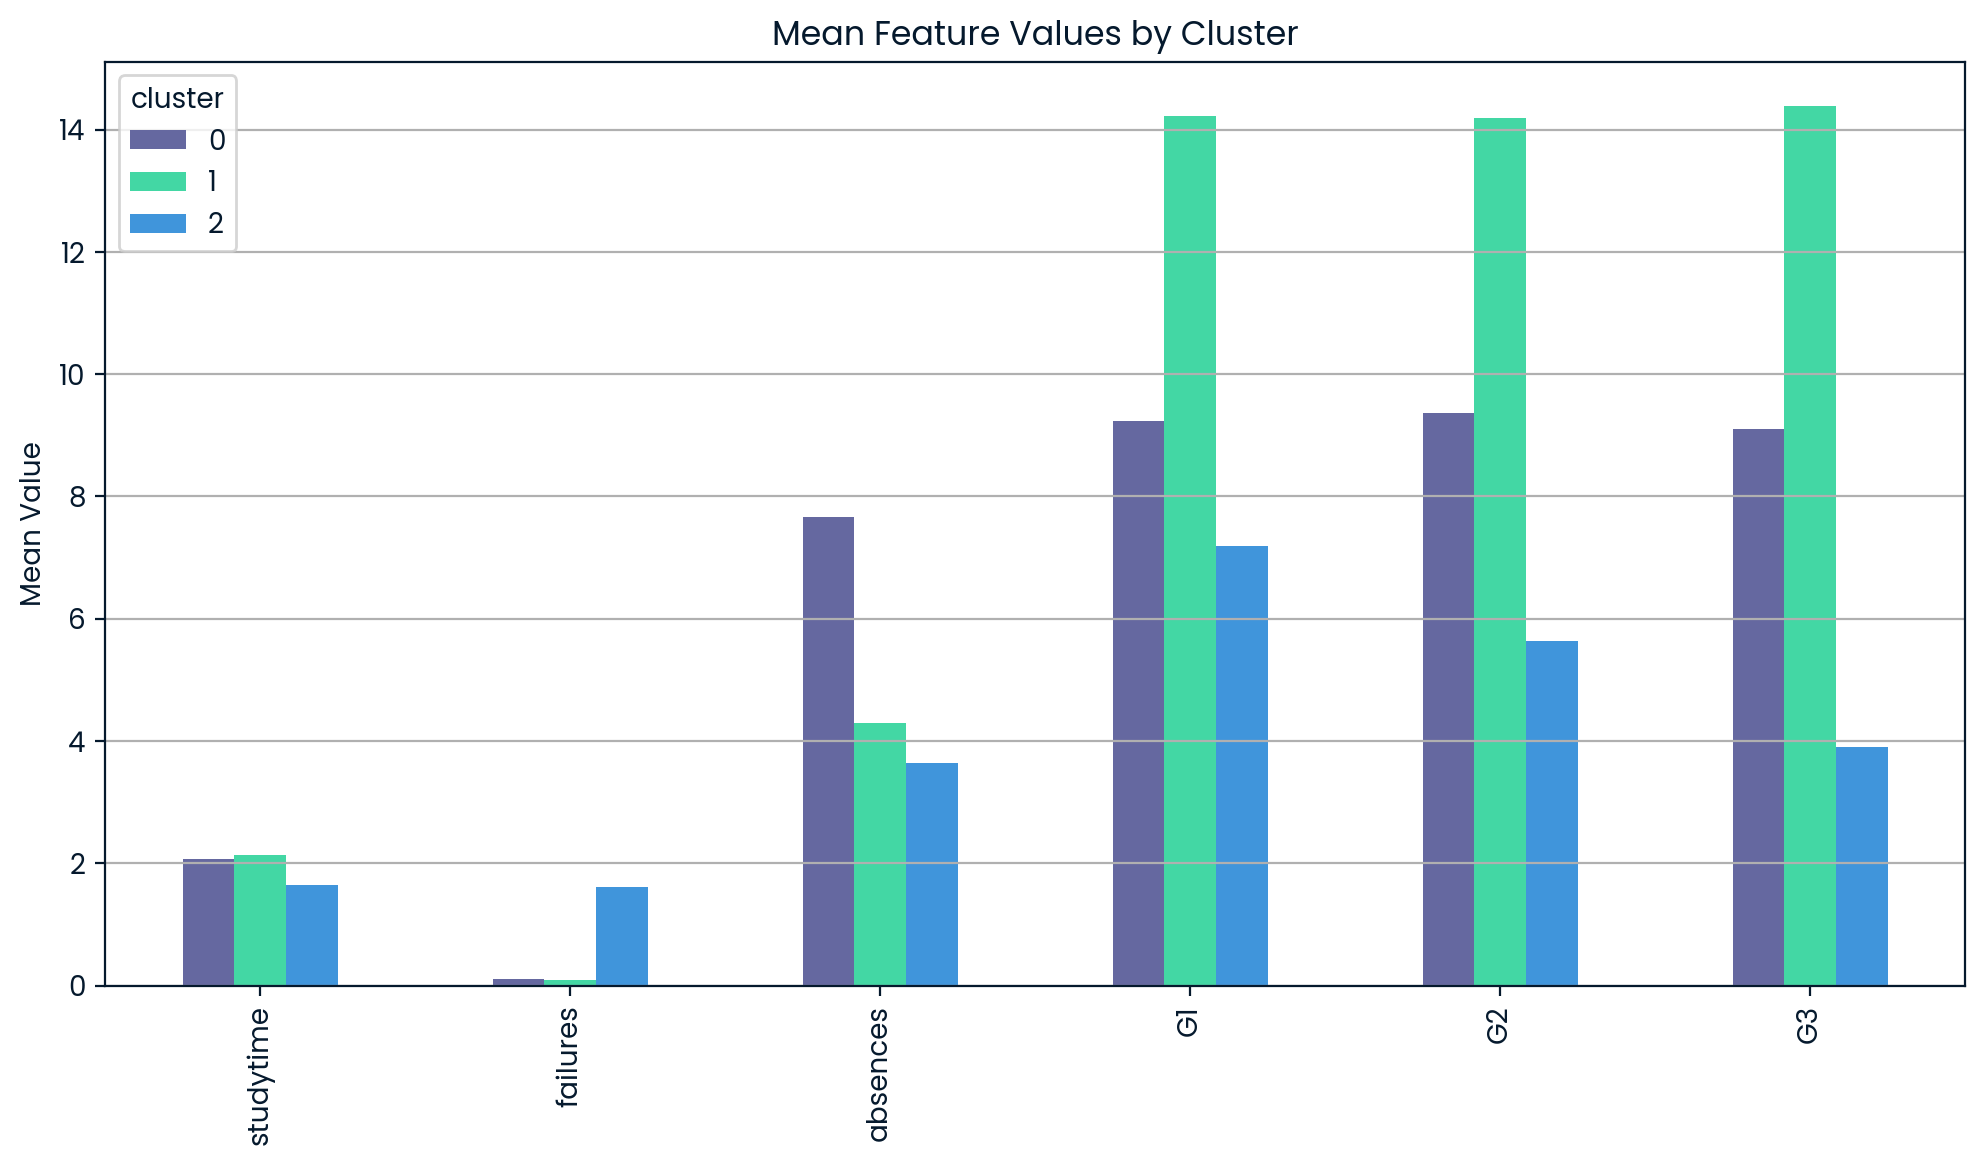

In [14]:
# Analyze the characteristics of each cluster
cluster_analysis = data.groupby('cluster')[features].mean()
print("Cluster Characteristics:")
print(cluster_analysis)

# Visualize the characteristics of each cluster
cluster_analysis.T.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Feature Values by Cluster')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.savefig('cluster_characteristics.png')
plt.show()